In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython.display import display, clear_output

from helpers import (find_seam, 
                     rm_seam, 
                     duplicate_seam,
                     calc_energy_e1,
                     calc_cme
                     )

%matplotlib inline

(200, 239, 3)


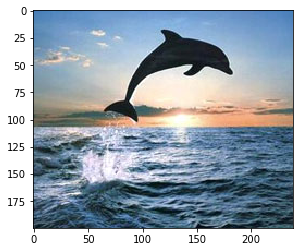

In [2]:
def imread(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imwrite(path, img):
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

fig8 = imread("./images/fig8.png")
plt.imshow(fig8)
print(fig8.shape)

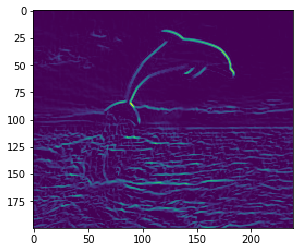

In [3]:
energy = calc_energy_e1(fig8)
energy_colored = cv2.applyColorMap(energy, cv2.COLORMAP_JET)
plt.imshow(energy_colored)

In [4]:
seam = find_seam(fig8)
print seam[:9]
print seam[-9:]

[(0, 182), (1, 181), (2, 182), (3, 182), (4, 183), (5, 182), (6, 183), (7, 182), (8, 181)]
[(191, 211), (192, 212), (193, 213), (194, 213), (195, 214), (196, 215), (197, 216), (198, 217), (199, 216)]


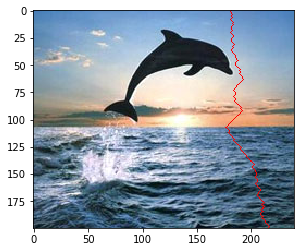

In [5]:
fig8_w_1_seam = duplicate_seam(fig8, seam, interpolate=False)
plt.imshow(fig8_w_1_seam)

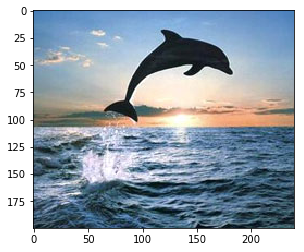

In [6]:
fig8_wider = duplicate_seam(fig8, seam)
plt.imshow(fig8_wider)

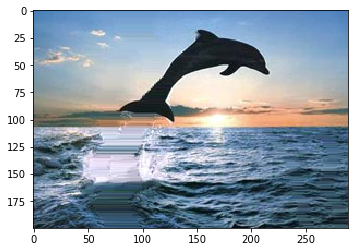

In [15]:
fig8_wider = fig8.copy()
for i in range(50):
    seam = find_seam(fig8_wider)
    fig8_wider = duplicate_seam(fig8_wider, seam)
plt.imshow(fig8_wider)
imwrite('test_img/fig8_stretch.png', fig8_wider)

In [8]:
def enlarge(img, by):
    h, w, _ = img.shape
    
    add_seams = int(w * by)

    img_wider = img.copy()
    img_w_seams = img.copy()
    img_fordel = img.copy()

    original_inds = list(range(w))
    seams_starts = np.array([])

    print "adding {} seams".format(add_seams)

    for i in range(add_seams):
        seam = find_seam(img_fordel)
        img_fordel = rm_seam(img_fordel, seam)

        seam_ind = seam[-1][1] # bottom pixel's x coord
        orig_ind = original_inds.pop(seam_ind)

        n_seams_before = len(seams_starts[seams_starts < orig_ind])

        seams_starts = np.append(seams_starts, orig_ind)

        offset = orig_ind + n_seams_before - seam_ind

        #print offset, seam_ind, orig_ind, n_seams_before

        adj_seam = (seam + np.array([0, offset])).tolist()
        adj_seam = [tuple(a) for a in adj_seam]

        img_w_seams = duplicate_seam(img_w_seams, adj_seam, interpolate=False)
        img_wider = duplicate_seam(img_wider, adj_seam)
    
    return img_wider, img_w_seams

adding 95 seams


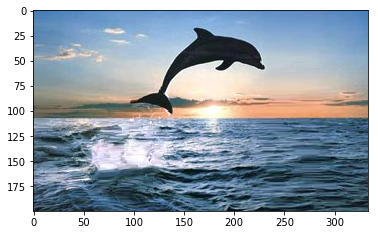

In [9]:
fig8_wider, fig8_w_seams = enlarge(fig8, .4)
plt.imshow(fig8_wider)

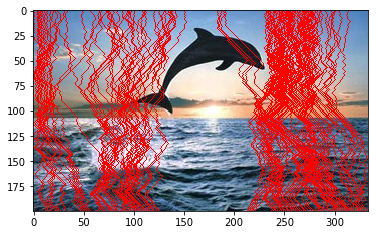

In [14]:
plt.imshow(fig8_w_seams)
imwrite('test_img/fig8_wider.png', fig8_wider)
imwrite('test_img/fig8_w_seams.png', fig8_w_seams)
imwrite('test_img/fig8_w_1_seam.png', fig8_w_1_seam)

adding 133 seams
(200, 467, 3)


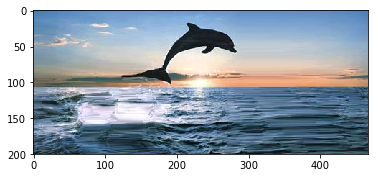

In [11]:
fig8_widerer, _ = enlarge(fig8_wider, .4)
print fig8_widerer.shape
plt.imshow(fig8_widerer)

In [13]:
imwrite('test_img/fig8_widerer.png', fig8_widerer)